In [1]:
import pandas as pd
df = pd.read_csv('breast-cancer-wisconsin.csv')

In [2]:
filt = df.describe(include='all')

In [3]:
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df['class'].replace(2,0,inplace=True)
df['class'].replace(4,1,inplace=True)
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [5]:
df.describe(include='all')

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,0.344778
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.475636
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,0.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,0.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,0.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,1.000000


In [6]:
df.nunique()

id                   645
clump_thickness       10
size_uniformity       10
shape_uniformity      10
marginal_adhesion     10
epithelial_size       10
bare_nucleoli         11
bland_chromatin       10
normal_nucleoli       10
mitoses                9
class                  2
dtype: int64

In [7]:
df['mitoses'].value_counts()

1     579
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
Name: mitoses, dtype: int64

In [8]:
df['bare_nucleoli'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nucleoli, dtype: int64

In [9]:
df.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [10]:
import numpy as np
df.replace('?',np.nan, inplace = True)

In [11]:
missing = df.isnull()
missing.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [12]:
missing.nunique()

id                   1
clump_thickness      1
size_uniformity      1
shape_uniformity     1
marginal_adhesion    1
epithelial_size      1
bare_nucleoli        2
bland_chromatin      1
normal_nucleoli      1
mitoses              1
class                1
dtype: int64

In [13]:
df['bare_nucleoli'] = pd.to_numeric(df['bare_nucleoli'], errors='coerce')
df['bare_nucleoli'].fillna(1, inplace = True)
df['bare_nucleoli'].value_counts()

1.0     418
10.0    132
5.0      30
2.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: bare_nucleoli, dtype: int64

In [14]:
df1 = df.drop(['id'],axis=1)
df1.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0


In [15]:
df1.columns

Index(['clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bare_nucleoli',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [16]:
X = df1[['clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bare_nucleoli',
       'bland_chromatin', 'normal_nucleoli', 'mitoses']].values
print(X[0:5])
print(X.shape)

[[ 5.  1.  1.  1.  2.  1.  3.  1.  1.]
 [ 5.  4.  4.  5.  7. 10.  3.  2.  1.]
 [ 3.  1.  1.  1.  2.  2.  3.  1.  1.]
 [ 6.  8.  8.  1.  3.  4.  3.  7.  1.]
 [ 4.  1.  1.  3.  2.  1.  3.  1.  1.]]
(699, 9)


In [17]:
y = df1['class'].values
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [18]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.20693572, -0.69999505, -0.74329904, -0.63324716, -0.54956136,
        -0.68697917, -0.17966213, -0.61182504, -0.34391178],
       [ 0.20693572,  0.28384518,  0.2668747 ,  0.76862067,  1.71010564,
         1.79966407, -0.17966213, -0.28411186, -0.34391178],
       [-0.50386559, -0.69999505, -0.74329904, -0.63324716, -0.54956136,
        -0.41068547, -0.17966213, -0.61182504, -0.34391178],
       [ 0.56233637,  1.59563215,  1.61377302, -0.63324716, -0.09762796,
         0.14190191, -0.17966213,  1.35445405, -0.34391178],
       [-0.14846494, -0.69999505, -0.74329904,  0.06768675, -0.54956136,
        -0.68697917, -0.17966213, -0.61182504, -0.34391178]])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(489, 9) (489,)
(210, 9) (210,)


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

When k =  1


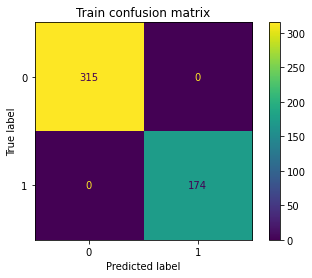

Train accuracy:  1.0


,precision,recall,f1-score,support
0,1.0,1.0,1.0,315.0
1,1.0,1.0,1.0,174.0


Average f1-score = 1.0


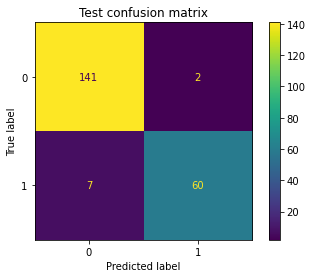

Test accuracy:  0.9571428571428572


,precision,recall,f1-score,support
0,0.952703,0.986014,0.969072,143.0
1,0.967742,0.895522,0.930233,67.0


Average f1-score = 0.9496523615439942

When k =  2


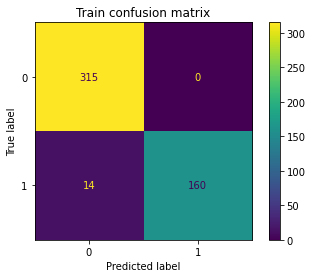

Train accuracy:  0.9713701431492843


,precision,recall,f1-score,support
0,0.957447,1.00000,0.978261,315.0
1,1.000000,0.91954,0.958084,174.0


Average f1-score = 0.9681723509502733


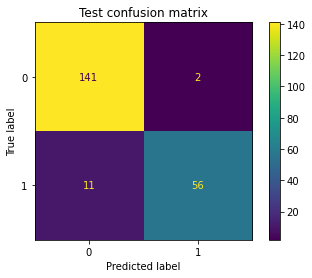

Test accuracy:  0.9380952380952381


,precision,recall,f1-score,support
0,0.927632,0.986014,0.955932,143.0
1,0.965517,0.835821,0.896000,67.0


Average f1-score = 0.9259661016949153

When k =  3


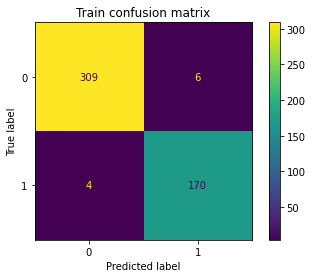

Train accuracy:  0.9795501022494888


,precision,recall,f1-score,support
0,0.987220,0.980952,0.984076,315.0
1,0.965909,0.977011,0.971429,174.0


Average f1-score = 0.9777525022747953


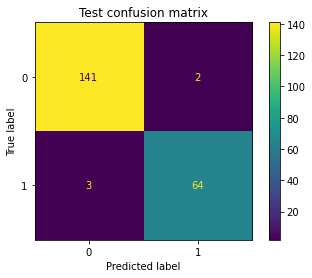

Test accuracy:  0.9761904761904762


,precision,recall,f1-score,support
0,0.979167,0.986014,0.982578,143.0
1,0.969697,0.955224,0.962406,67.0


Average f1-score = 0.9724922061250687

When k =  4


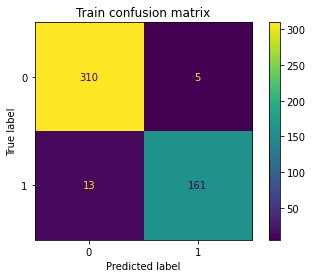

Train accuracy:  0.9631901840490797


,precision,recall,f1-score,support
0,0.959752,0.984127,0.971787,315.0
1,0.969880,0.925287,0.947059,174.0


Average f1-score = 0.9594228286926054


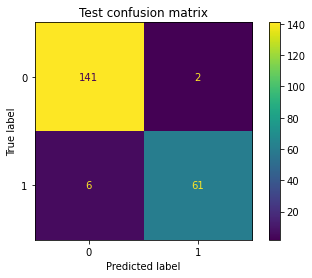

Test accuracy:  0.9619047619047619


,precision,recall,f1-score,support
0,0.959184,0.986014,0.972414,143.0
1,0.968254,0.910448,0.938462,67.0


Average f1-score = 0.9554376657824935

When k =  5


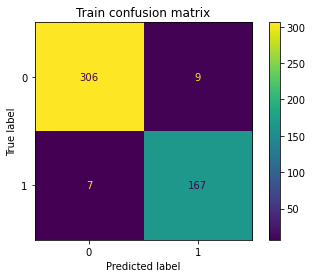

Train accuracy:  0.967280163599182


,precision,recall,f1-score,support
0,0.977636,0.971429,0.974522,315.0
1,0.948864,0.959770,0.954286,174.0


Average f1-score = 0.9644040036396724


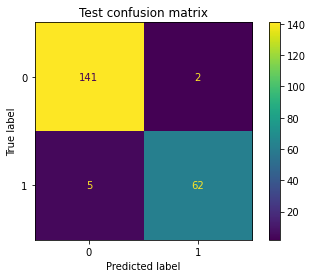

Test accuracy:  0.9666666666666667


,precision,recall,f1-score,support
0,0.965753,0.986014,0.975779,143.0
1,0.968750,0.925373,0.946565,67.0


Average f1-score = 0.961171716104493

When k =  6


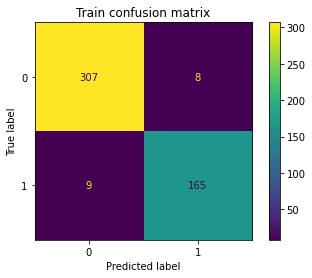

Train accuracy:  0.9652351738241309


,precision,recall,f1-score,support
0,0.971519,0.974603,0.973059,315.0
1,0.953757,0.948276,0.951009,174.0


Average f1-score = 0.9620336413085675


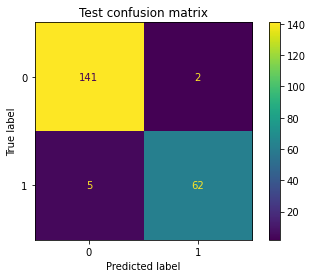

Test accuracy:  0.9666666666666667


,precision,recall,f1-score,support
0,0.965753,0.986014,0.975779,143.0
1,0.968750,0.925373,0.946565,67.0


Average f1-score = 0.961171716104493

When k =  7


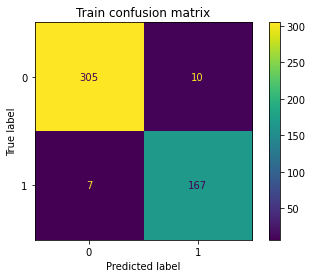

Train accuracy:  0.9652351738241309


,precision,recall,f1-score,support
0,0.977564,0.968254,0.972887,315.0
1,0.943503,0.959770,0.951567,174.0


Average f1-score = 0.9622268569636989


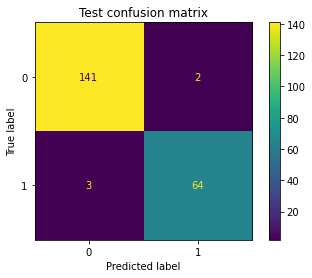

Test accuracy:  0.9761904761904762


,precision,recall,f1-score,support
0,0.979167,0.986014,0.982578,143.0
1,0.969697,0.955224,0.962406,67.0


Average f1-score = 0.9724922061250687

When k =  8


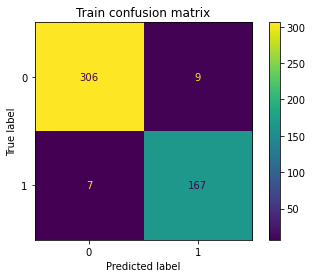

Train accuracy:  0.967280163599182


,precision,recall,f1-score,support
0,0.977636,0.971429,0.974522,315.0
1,0.948864,0.959770,0.954286,174.0


Average f1-score = 0.9644040036396724


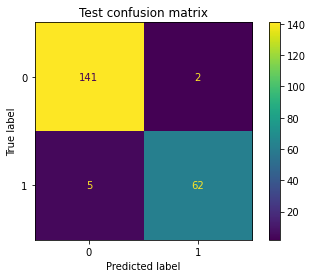

Test accuracy:  0.9666666666666667


,precision,recall,f1-score,support
0,0.965753,0.986014,0.975779,143.0
1,0.968750,0.925373,0.946565,67.0


Average f1-score = 0.961171716104493

When k =  9


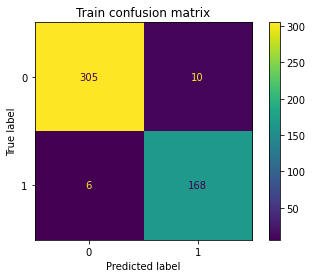

Train accuracy:  0.967280163599182


,precision,recall,f1-score,support
0,0.980707,0.968254,0.974441,315.0
1,0.943820,0.965517,0.954545,174.0


Average f1-score = 0.9644931745570724


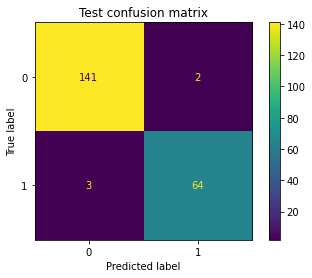

Test accuracy:  0.9761904761904762


,precision,recall,f1-score,support
0,0.979167,0.986014,0.982578,143.0
1,0.969697,0.955224,0.962406,67.0


Average f1-score = 0.9724922061250687

When k =  10


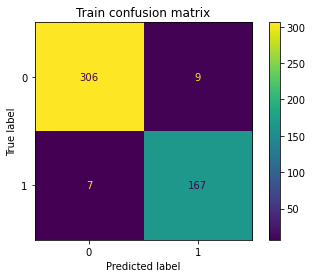

Train accuracy:  0.967280163599182


,precision,recall,f1-score,support
0,0.977636,0.971429,0.974522,315.0
1,0.948864,0.959770,0.954286,174.0


Average f1-score = 0.9644040036396724


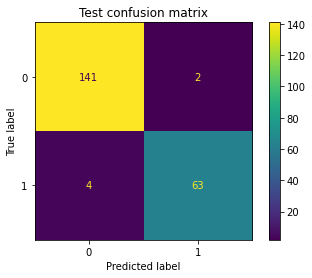

Test accuracy:  0.9714285714285714


,precision,recall,f1-score,support
0,0.972414,0.986014,0.979167,143.0
1,0.969231,0.940299,0.954545,67.0


Average f1-score = 0.9668560606060607



In [23]:
Ks = 11

for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_testpre = neigh.predict(X_train)
    yhat = neigh.predict(X_test)
    a = pd.DataFrame(precision_recall_fscore_support(y_train,y_testpre)).transpose()
    a.rename(columns={0:'precision',1:'recall',2:'f1-score',3:'support'}, inplace= True)
    avg_f1a = a['f1-score'].sum() / 2
    b = pd.DataFrame(precision_recall_fscore_support(y_test,yhat)).transpose()
    b.rename(columns={0:'precision',1:'recall',2:'f1-score',3:'support'}, inplace = True)
    avg_f1b = b['f1-score'].sum() / 2
    print("When k = ",n)
    matrix1 = plot_confusion_matrix(neigh, X_train,y_train)
    matrix1.ax_.set_title("Train confusion matrix")
    plt.show()
    print("Train accuracy: ", metrics.accuracy_score(y_train, y_testpre))
    display(a)
    print("Average f1-score =",avg_f1a)
    matrix2 = plot_confusion_matrix(neigh, X_test, y_test)
    matrix2.ax_.set_title('Test confusion matrix')
    plt.show()
    print("Test accuracy: ", metrics.accuracy_score(y_test, yhat))
    display(b)
    print("Average f1-score =",avg_f1b)
    print("")

จะเห็นได้ว่า เมื่อค่า k  มีค่าน้อย จะทำให้เกิด overfitting ซึ่งปัญหานี้จะค่อยๆ ลดลงเมื่อเพิ่มค่า k ให้มากขึ้น
จากการลองปรับค่า k พบว่า model ทำงานได้ดีที่สุดเมื่อ k = 3 เพราะมีค่า train/test accuracy ดีมากกว่าการทำ k-nearest classification ที่มีค่า k มากขึ้น 2-3 ค่า นอกจากนี้ ค่า average-f1-score ยังมีค่าที่ดีกว่าการทำ k-nearest classification เมื่อ k มีค่า 4-8 อีกด้วย